# SAI PRASAD PARSA  (saiparsa)---------------MLSP ASSIGNMENT 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import math
import cv2
import librosa
import scipy
import cmath
import sys

# 1. Audio Debeeper


In [590]:
from scipy.io import wavfile
data,fs = librosa.load('x.wav',sr=16000)

In [591]:
import IPython.display as ipd

ipd.Audio(data, rate=16000)

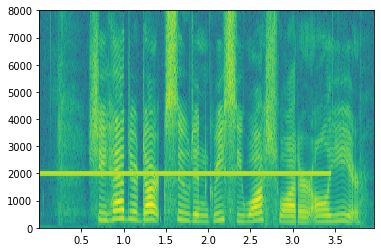

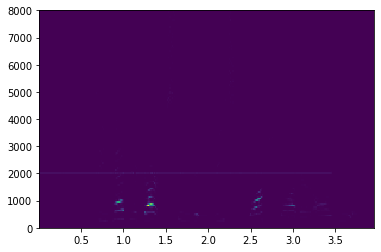

In [592]:
plt.specgram(data,Fs=fs)
plt.show()
f, t, Sxx = scipy.signal.spectrogram(data, fs=fs)
plt.pcolormesh(t, f, Sxx)

[[1.        +0.j         1.        +0.j         1.        +0.j
  ... 1.        +0.j         1.        +0.j
  1.        +0.j        ]
 [1.        +0.j         0.99999229-0.00392698j 0.99996916-0.0078539j
  ... 0.99993061+0.0117807j  0.99996916+0.0078539j
  0.99999229+0.00392698j]
 [1.        +0.j         0.99996916-0.0078539j  0.99987663-0.01570732j
  ... 0.99972243+0.02355976j 0.99987663+0.01570732j
  0.99996916+0.0078539j ]
 ...
 [1.        +0.j         0.99993061+0.0117807j  0.99972243+0.02355976j
  ... 0.9993755 -0.03533556j 0.99972243-0.02355976j
  0.99993061-0.0117807j ]
 [1.        +0.j         0.99996916+0.0078539j  0.99987663+0.01570732j
  ... 0.99972243-0.02355976j 0.99987663-0.01570732j
  0.99996916-0.0078539j ]
 [1.        +0.j         0.99999229+0.00392698j 0.99996916+0.0078539j
  ... 0.99993061-0.0117807j  0.99996916-0.0078539j
  0.99999229-0.00392698j]]


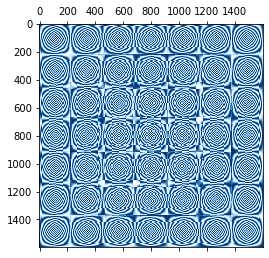

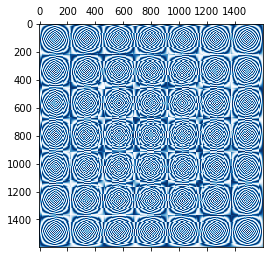

In [613]:
N=1600
n=np.arange(N)
f=n.reshape(-1,1)
F= np.exp(-2j*np.pi*f*n/N)
print(F)
plt.matshow(np.real(F),cmap='Blues')
plt.show()
plt.matshow(np.imag(F),cmap='Blues')
plt.show()

In [612]:
sample=np.zeros(N)
a=0
b=N
X=[]
hann=[]
while b<data.shape[0]:
    sample=data[a:b]
    window=np.hanning(len(sample))
    X.append(np.multiply(sample,window))
    a= int((a+b)/2)
    b= int(a+N)
X=np.asarray(X).T
X

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.77492592e-08,  7.76314573e-08,  7.76314573e-08, ...,
        -1.37828232e-08,  4.35867059e-09, -7.06811447e-10],
       [ 2.19110703e-07,  2.20053114e-07,  2.20053114e-07, ...,
        -6.03143440e-08, -4.71205813e-10,  2.35602906e-09],
       ...,
       [-3.07226190e-07, -3.04398955e-07, -3.05812572e-07, ...,
        -8.01049881e-09,  2.35602906e-09,  9.42411625e-10],
       [-5.46600852e-08, -5.40710757e-08, -5.40710757e-08, ...,
        -1.76702862e-09, -5.89009539e-10,  4.71207631e-10],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00]])

In [600]:
X.shape
FX=np.matmul(F,X)
X.shape

(1600, 78)

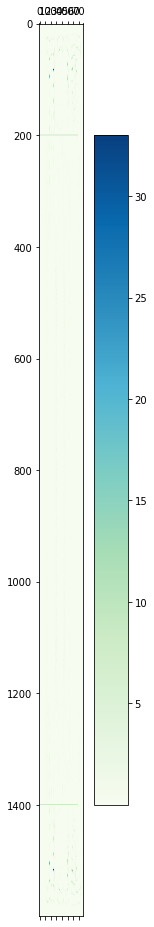

In [601]:
plt.matshow(abs(FX),cmap='GnBu')
plt.colorbar()

In [602]:
#based on the plot we can see that the following rows are responsible for beep sound.
FX[199]=0
FX[200]=0
FX[201]=0
FX[1399]=0
FX[1400]=0
FX[1401]=0

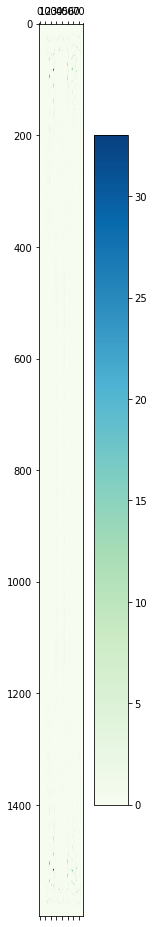

In [603]:
plt.matshow(abs(FX),cmap='GnBu')
plt.colorbar()

In [604]:
F_inv= np.exp(2j*np.pi*f*n/1600)

In [605]:
Identity_matrix = np.matmul(F,F_inv)
np.real(Identity_matrix)

array([[ 1.60000000e+03, -1.42108547e-14, -1.98951966e-13, ...,
         8.55493454e-12,  3.64437369e-11,  4.59579041e-11],
       [-1.42108547e-14,  1.60000000e+03, -4.97379915e-14, ...,
         9.95470373e-12,  2.08899564e-11,  2.60484967e-11],
       [-1.98951966e-13, -4.97379915e-14,  1.60000000e+03, ...,
        -3.23296945e-12, -1.91135996e-12,  1.56887836e-11],
       ...,
       [-1.09920961e-11, -1.17523768e-11, -6.43041176e-12, ...,
         1.60000000e+03, -7.41096073e-11, -4.20854462e-11],
       [ 1.38719258e-10,  8.66364758e-11,  5.90603122e-11, ...,
        -2.28155272e-10,  1.60000000e+03,  2.25618635e-10],
       [ 9.79483161e-11,  4.56026328e-11,  3.13420401e-11, ...,
        -2.13660201e-11, -5.15427701e-11,  1.60000000e+03]])

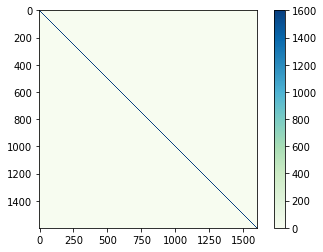

In [606]:
# To check the identitiy matrix
plt.imshow(np.real(Identity_matrix),cmap='GnBu')
plt.colorbar()

In [607]:
X_cap=np.matmul(F_inv,FX)
X_cap=np.real(X_cap).T

In [608]:
X_cap.shape

(78, 1600)

In [609]:
recovered=[]
for t in range(77):
    recovered.append(X_cap[t][int(N/2):N]+X_cap[t+1][0:int(N/2)]) 

In [610]:
recovered=np.concatenate(recovered,axis=0)

In [611]:
#DeBeeped Audio
import IPython.display as ipd

ipd.Audio(recovered, rate=16000)

# 2 Parallax 

In [2]:
june = sio.loadmat('june.mat',mat_dtype=True)

In [3]:
june = june['june']
june = june.astype(np.int32)

In [5]:
june.shape

(2700, 2)

In [7]:
december = sio.loadmat('december.mat',mat_dtype=True)

In [8]:
december = december['december']
december= december.astype(np.int32)

In [9]:
disparity =  (december[:,[0]])-(june[:,[0]]) 

In [10]:
disparity.shape

(2700, 1)

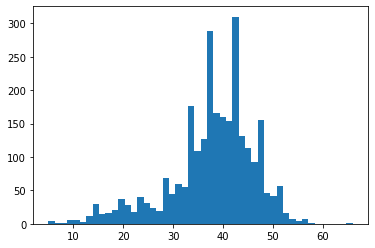

In [621]:
plt.hist(disparity,bins='auto')
plt.show()
# We can vaguely see 2 clusters with means roughly centered at 25 and 40 respectively.

In [622]:
U = np.zeros([2700,2])
out=0
theta=np.random.rand(2)
theta=np.reshape(theta,(2,1))

In [623]:

for i in range(200):
    p_theta=theta
    num_clusters = 2
    for j in range(num_clusters):
        for i in range(2700):
            val=np.square(disparity[i]-theta[0])
            val1=np.square(disparity[i]-theta[1])
            #print(val,val1)
            if val>val1:
                cmp=0
            else:
                cmp=1
            #print (cmp)
            if (cmp==j):
                U[i][j] = 1

            else:
                U[i][j] = 0
        #print(U)
    for j in range(2):
        c=np.count_nonzero(U[:,j])
        if c==0:
            c=1
        for i in range(2700):            
            out =out+(U[i][j]*disparity[i])
        theta[j]=out/c
        out=0
    

In [624]:
theta

array([[24.35873606],
       [41.226642  ]])

The cluster with high mean 41.22 corresponds to the stars in my galaxy and the cluster with low mean 24.35 coressponds to stars in other galaxy.
During course of revolution we observe that closeby stars seem to oscillate more compared to the far ones. In this case we can expect that the stars from our galaxy oscillate more as they are near. The Disparity matrix is basically the amount of oscillation we observed which represents 2 clusters centered at 41.22 and 24.35.

# 3 GMM using EM

In [625]:
pj=[0,0]

In [626]:
pj[0]=np.sum(U[:,0])/2700
pj[1]=np.sum(U[:,1])/2700

In [627]:
out = np.multiply(U,disparity)
mean=[0,0]
for j in range(2):
    mean[j]=np.sum(out[:,j])/np.count_nonzero(out[:,j])

In [628]:
var = [0,0]

var[0]=np.var(out[:,0])
var[1]=np.var(out[:,1])

In [629]:
mean=np.asarray(mean)
mean=mean.reshape(2,1)

In [630]:
pj=np.asarray(pj)
pj=pj.reshape(2,1)

In [631]:

for k in range(100):
    n=np.zeros([2700,2])
    u=np.zeros([2700,2])
    for i in range(2700):
        for j in range(2):
            n[i][j]=((1/np.sqrt(2*math.pi*var[j]))* math.exp((-1/2)*np.square((disparity[i]-mean[j]))*(1/var[j])))
            
            u[i][j]=(pj[j]*n[i][j])
    print(n)
    den=np.asarray(np.sum(u,axis=1))
    den=den.reshape(2700,1)
    u=u/den
    #print(den)
    
    sum_uij=np.sum(u,axis=0)
    #print(sum_uij)
    
    num=0
    for j in range(2):
        for i in range(2700):
            num=num+u[i][j]*disparity[i]
        mean[j]=num/sum_uij[j]
        num=0

    for j in range(2):
        pj[j]=np.asarray(sum_uij[j])/2700
        #print(pj)

    num1=0
    for j in range(2):
        for i in range(2700):
            num1=num1+(u[i][j]*np.square(disparity[i]-mean[j]))
        var[j]=num1/sum_uij[j]
        num1=0

    #print(u,pj,var)


[[0.01196561 0.02333233]
 [0.00865434 0.02336872]
 [0.00865434 0.02336872]
 ...
 [0.0180834  0.02268525]
 [0.00259222 0.02161862]
 [0.01386577 0.02319422]]
[[0.02799326 0.05066183]
 [0.02225714 0.04765836]
 [0.02225714 0.04765836]
 ...
 [0.03610616 0.0491259 ]
 [0.0084024  0.02681194]
 [0.03083726 0.05097006]]
[[0.02370642 0.05696063]
 [0.01958018 0.05351532]
 [0.01958018 0.05351532]
 ...
 [0.02961832 0.05363485]
 [0.00898367 0.02713411]
 [0.02575222 0.05698605]]
[[0.02085369 0.06279002]
 [0.01696065 0.05929161]
 [0.01696065 0.05929161]
 ...
 [0.02673213 0.05681987]
 [0.00749183 0.02753874]
 [0.02284027 0.06225755]]
[[0.01893948 0.06656843]
 [0.01493323 0.06341666]
 [0.01493323 0.06341666]
 ...
 [0.02531485 0.0580942 ]
 [0.00591976 0.02809723]
 [0.02104808 0.06541151]]
[[0.01751988 0.06872502]
 [0.01337058 0.06606282]
 [0.01337058 0.06606282]
 ...
 [0.02443049 0.05832611]
 [0.00470611 0.02871577]
 [0.01976458 0.06703414]]
[[0.01640671 0.06994012]
 [0.01216139 0.06773118]
 [0.01216139 0

[[1.49540843e-03 6.96223222e-02]
 [6.24653898e-04 6.68491000e-02]
 [6.24653898e-04 6.68491000e-02]
 ...
 [4.65864320e-03 5.88416281e-02]
 [2.61637131e-05 2.84183195e-02]
 [2.23503240e-03 6.78681996e-02]]
[[1.39545538e-03 6.95571154e-02]
 [5.74775880e-04 6.67526342e-02]
 [5.74775880e-04 6.67526342e-02]
 ...
 [4.43035522e-03 5.88592244e-02]
 [2.29252975e-05 2.83773160e-02]
 [2.09944236e-03 6.78282775e-02]]
[[1.30348170e-03 6.94930922e-02]
 [5.29539661e-04 6.66586286e-02]
 [5.29539661e-04 6.66586286e-02]
 ...
 [4.21604792e-03 5.88754692e-02]
 [2.01302955e-05 2.83379291e-02]
 [1.97381455e-03 6.77886895e-02]]
[[1.21900124e-03 6.94304075e-02]
 [4.88574543e-04 6.65672451e-02]
 [4.88574543e-04 6.65672451e-02]
 ...
 [4.01530641e-03 5.88904160e-02]
 [1.77192581e-05 2.83001721e-02]
 [1.85764071e-03 6.77495667e-02]]
[[1.14152867e-03 6.93692043e-02]
 [4.51525219e-04 6.64786277e-02]
 [4.51525219e-04 6.64786277e-02]
 ...
 [3.82766033e-03 5.89041233e-02]
 [1.56398825e-05 2.82640497e-02]
 [1.75039918e-

 [6.20649271e-04 6.70193641e-02]]
[[3.61605217e-04 6.83303952e-02]
 [1.14168054e-04 6.50503416e-02]
 [1.14168054e-04 6.50503416e-02]
 ...
 [1.64378095e-03 5.90244071e-02]
 [1.80514260e-06 2.77424163e-02]
 [6.16445316e-04 6.70147409e-02]]
[[3.59116679e-04 6.83243167e-02]
 [1.13232179e-04 6.50423394e-02]
 [1.13232179e-04 6.50423394e-02]
 ...
 [1.63539508e-03 5.90245766e-02]
 [1.78211643e-06 2.77397858e-02]
 [6.12584694e-04 6.70104666e-02]]
[[3.56832473e-04 6.83187015e-02]
 [1.12374274e-04 6.50349504e-02]
 [1.12374274e-04 6.50349504e-02]
 ...
 [1.62768392e-03 5.90247284e-02]
 [1.76110345e-06 2.77373595e-02]
 [6.09038862e-04 6.70065164e-02]]
[[3.54735443e-04 6.83135159e-02]
 [1.11587621e-04 6.50281294e-02]
 [1.11587621e-04 6.50281294e-02]
 ...
 [1.62059288e-03 5.90248644e-02]
 [1.74191567e-06 2.77351220e-02]
 [6.05781720e-04 6.70028668e-02]]
[[3.52809926e-04 6.83087284e-02]
 [1.10866115e-04 6.50218343e-02]
 [1.10866115e-04 6.50218343e-02]
 ...
 [1.61407181e-03 5.90249866e-02]
 [1.72438439e

In [456]:
mean# means

array([[40.15811991],
       [20.87681464]])

In [457]:
var#variences

[array([34.09613543]), array([34.68679298])]

In [588]:
pj #Probabilities

array([[0.88109911],
       [0.11890089]])

As we are dealing with a mixture of two gaussians there are more factors to be considered raather than just the means. Kmeans assumes that the two clusters are perfectly circular gaussians and both the clusters are equally important. Kmeans clusters the data taking means as the only consideration as misses to utilize the covarience information which is also an important factor in mixture of gaussians. Where as the GMM utilizes the covarience information including the off diagonal elements and doesn't rely entirely on the means.
For all these reasons I would choose GMM as it serves this case better.

# 4 PCA


In [556]:
img = cv2.imread('IMG_1878.jpg')

In [557]:
img.shape

(1024, 768, 3)

In [558]:

def data_gen(Data,N):
    for i in range(N):
        ind=np.random.randint(1016)
        if (i==0):
            ar = Data[ind:ind+8,:]
        else:
            ar=np.concatenate([ar, Data[ind:ind+8,:]],axis=1)
    
    return ar

In [585]:
def pca(img,blocks):
    Red=img[:,:,0]
    Green=img[:,:,1]
    Blue=img[:,:,2]
    
    r=data_gen(Red,blocks)
    g=data_gen(Green,blocks)
    b=data_gen(Blue,blocks)
    R=np.concatenate([r,g,b],axis=1)

    R=R-np.mean(R)
    R_cv=R@R.T/blocks-1
    eig=np.linalg.eigh(R_cv)
    W=eig[1]
    #print(W.shape)
    plt.imshow(W.T,cmap='BuGn')
    plt.colorbar()

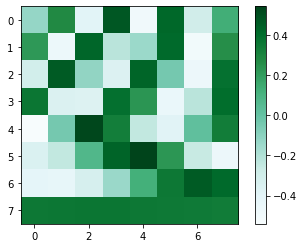

In [586]:
pca(img,3)

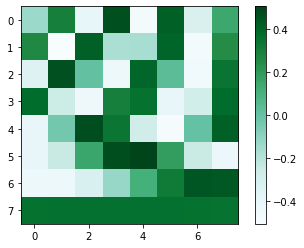

In [587]:
pca(img,30)

Here we can observe that the eigen vectors are more clear and distinct as we increase the number of blocks we consider.